In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [18]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

pd.set_option('display.max_columns', train_data.shape[0])

In [19]:
train_data.shape, test_data.shape

((17544, 36), (5976, 36))

In [4]:
train_data.columns

Index(['일시', '서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 풍향(16방위)',
       '서울 습도(%)', '서울 증기압(hPa)', '서울 이슬점온도(°C)', '서울 현지기압(hPa)',
       '서울 해면기압(hPa)', '서울 일조(hr)', '서울 일사(MJ/m2)', '서울 적설(cm)', '서울 시정(10m)',
       '서울 지면온도(°C)', '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 풍향(16방위)',
       '부산 습도(%)', '부산 증기압(hPa)', '부산 이슬점온도(°C)', '부산 현지기압(hPa)',
       '부산 해면기압(hPa)', '부산 일조(hr)', '부산 일사(MJ/m2)', '부산 적설(cm)', '부산 시정(10m)',
       '부산 지면온도(°C)', '소요시간', 'holiday', 'Korean_holiday', 'year', 'month',
       'time', 'weekend'],
      dtype='object')

#### 이변량 분석

In [20]:
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [6]:
def plot_scatterplot(data):
    target = '소요시간'
    for feature in data.columns:
        if data[feature].dtype=='object':
            continue
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.kdeplot(data[feature])
        plt.subplot(1, 2, 2)
        sns.regplot(feature, target, data=data, line_kws={"color": "red"})
        plt.grid()
        plt.show()

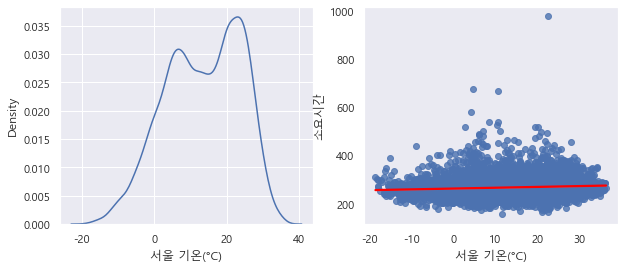

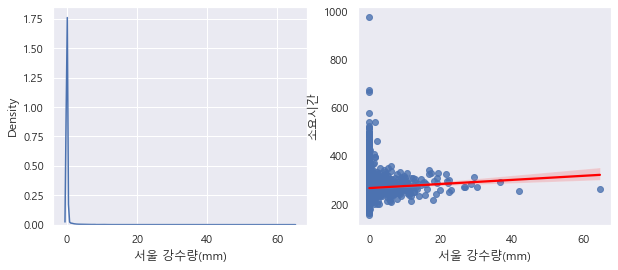

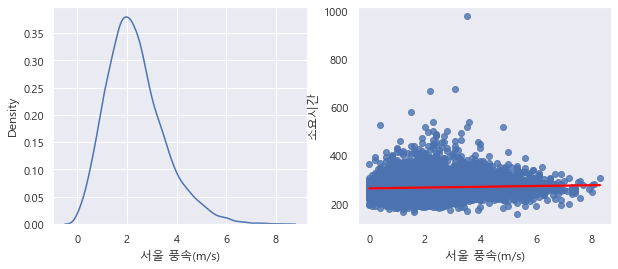

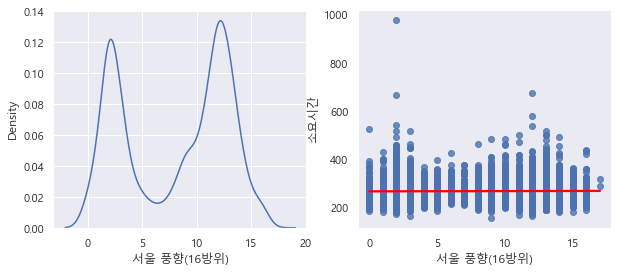

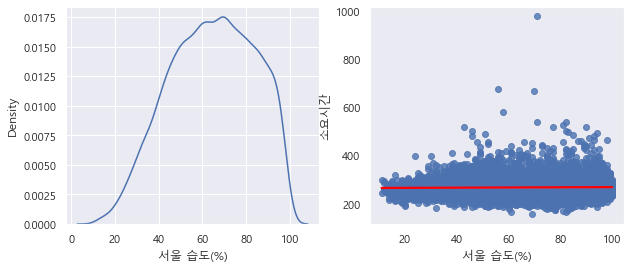

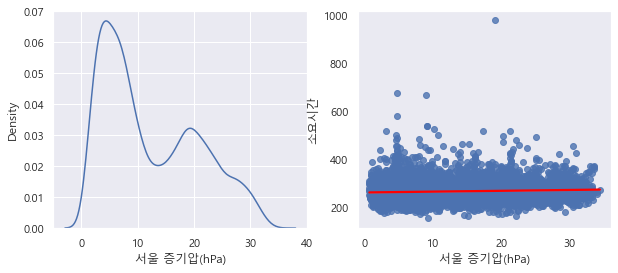

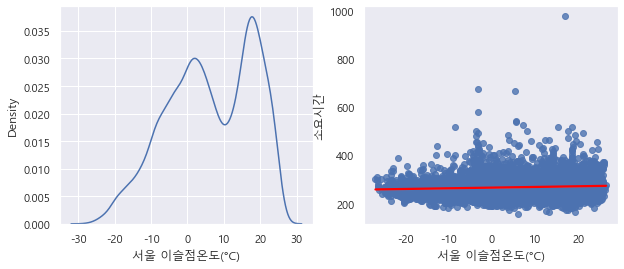

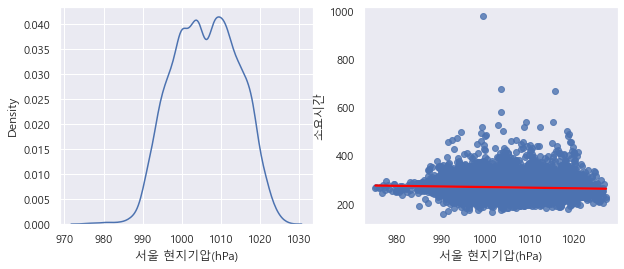

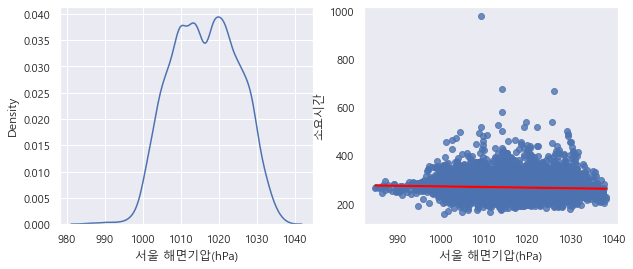

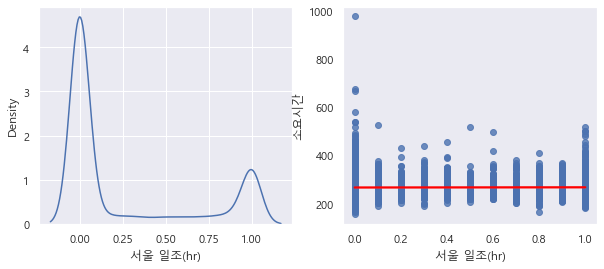

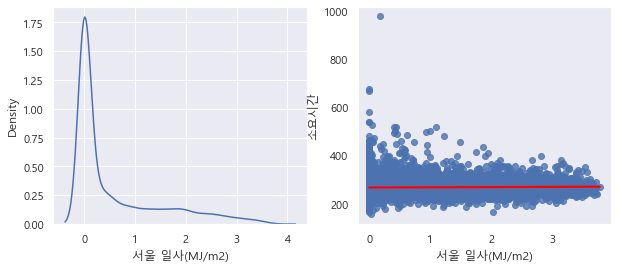

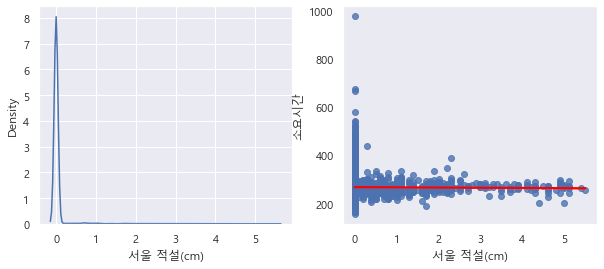

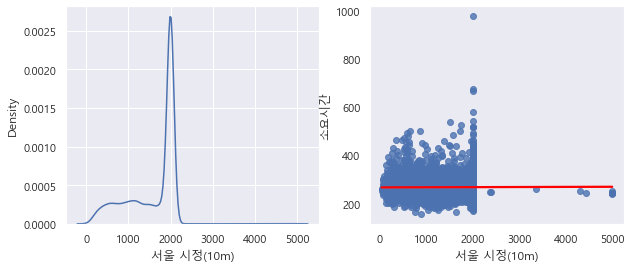

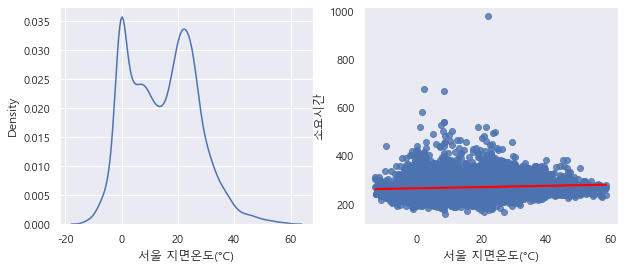

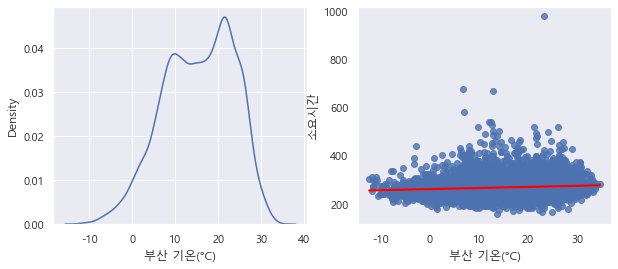

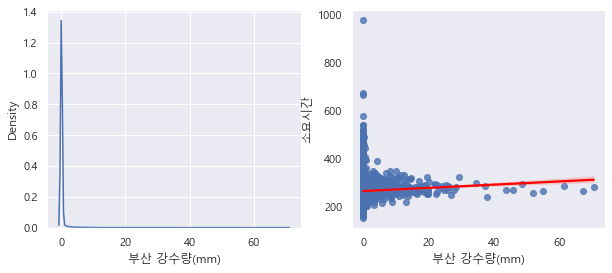

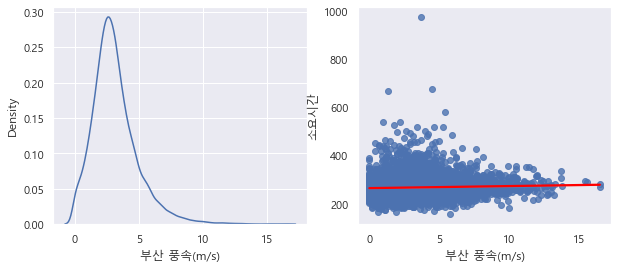

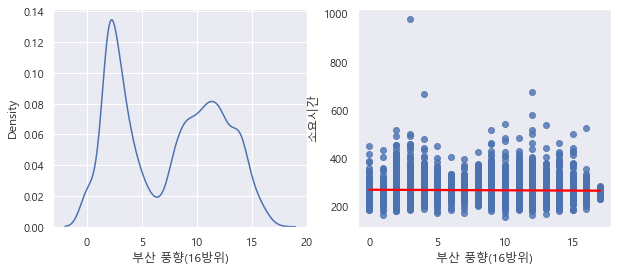

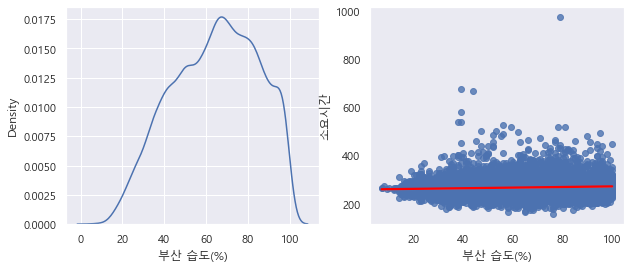

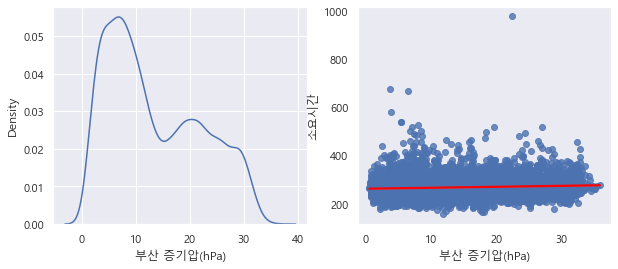

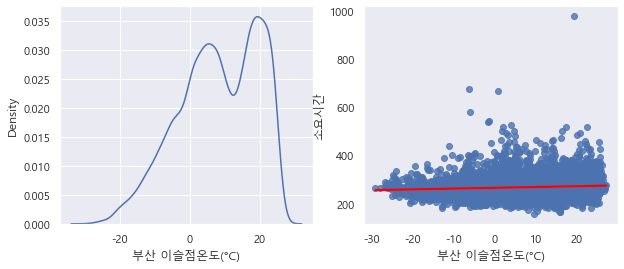

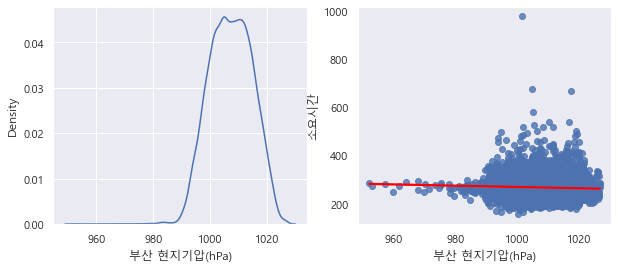

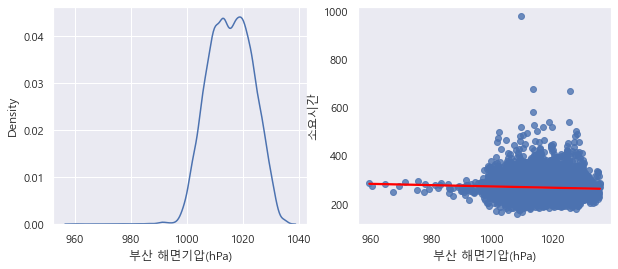

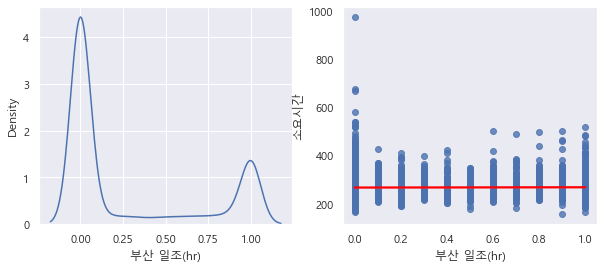

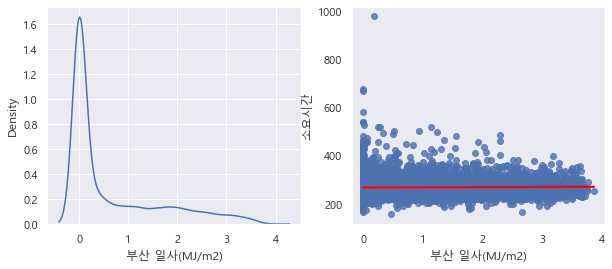

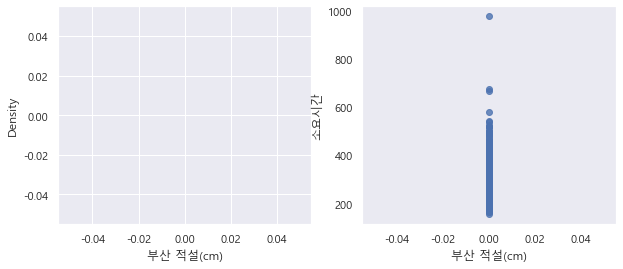

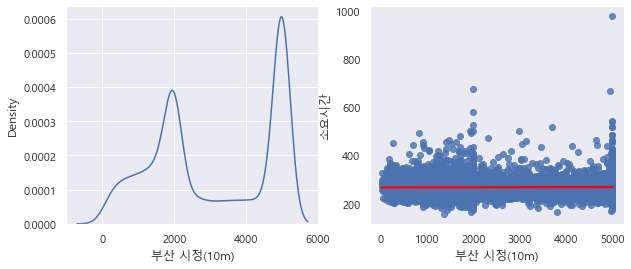

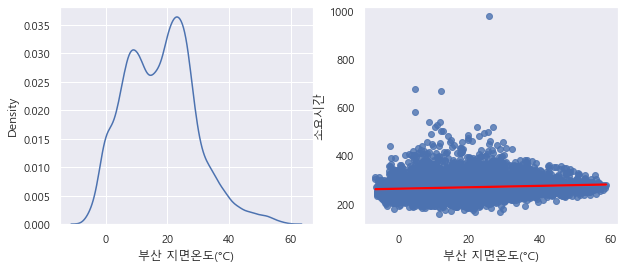

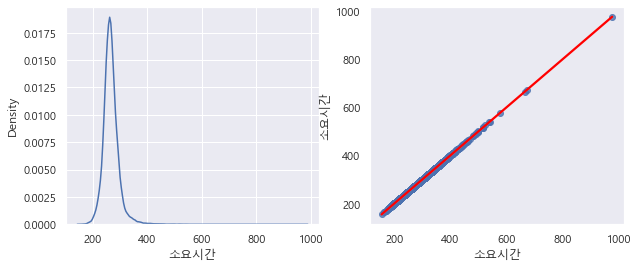

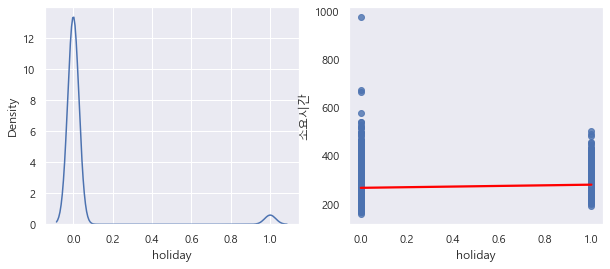

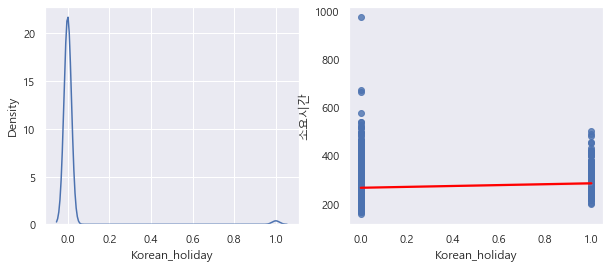

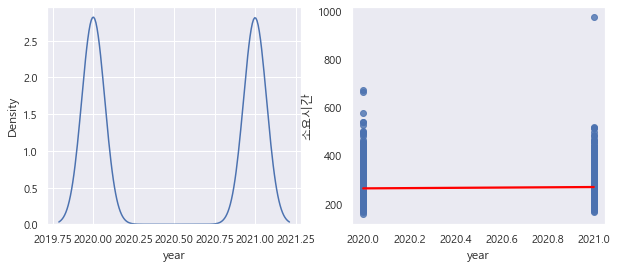

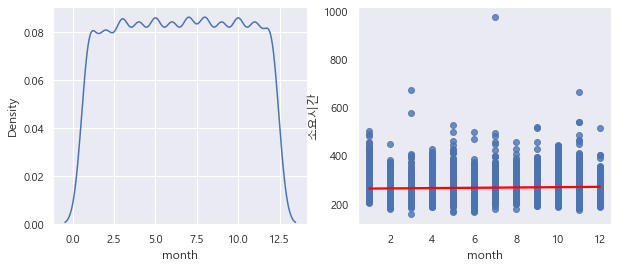

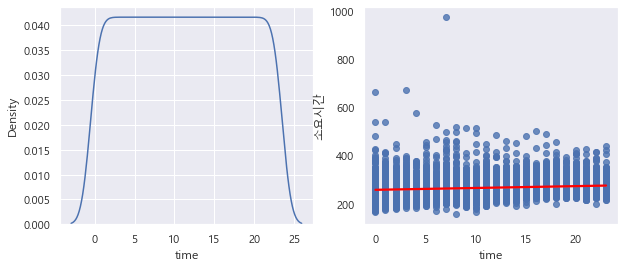

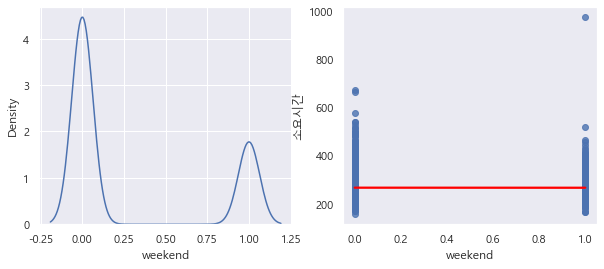

In [7]:
plot_scatterplot(train_data)

#### 명절일 때 데이터 이변량 분석

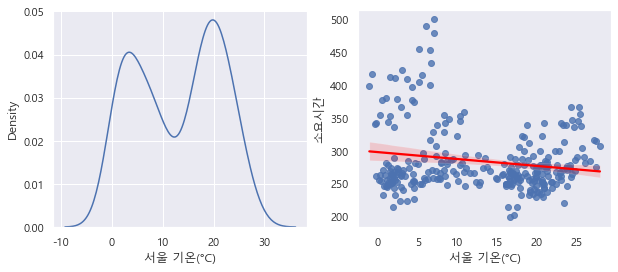

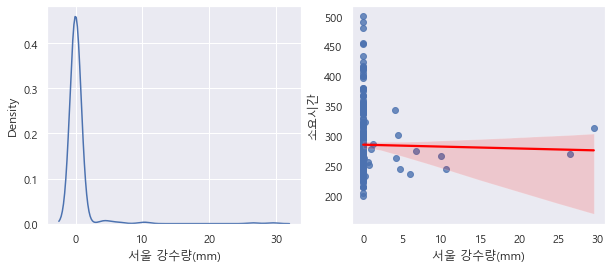

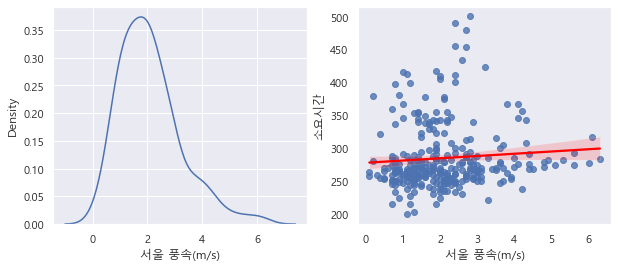

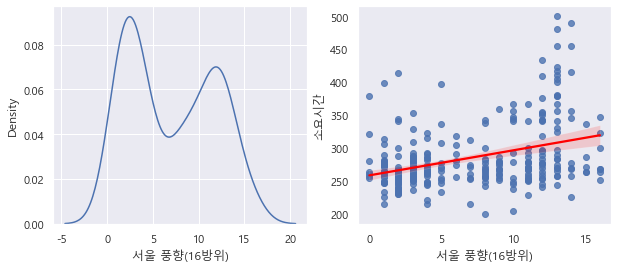

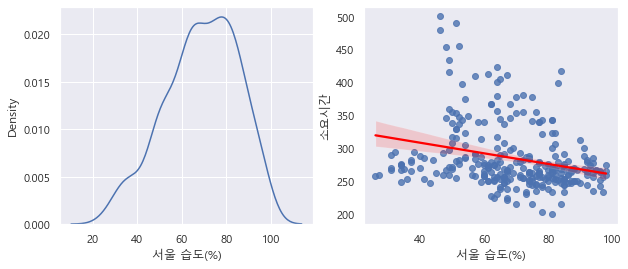

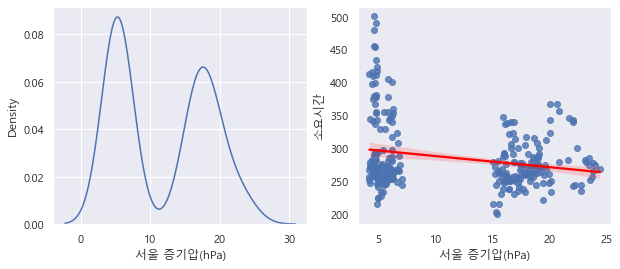

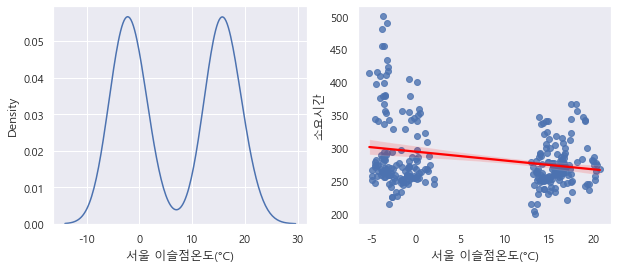

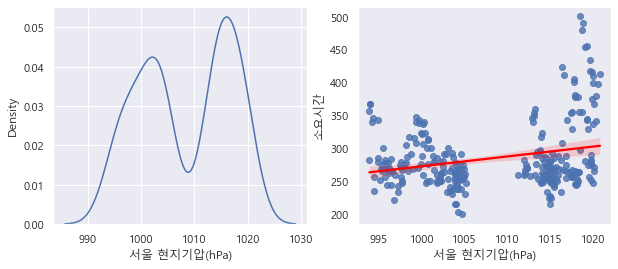

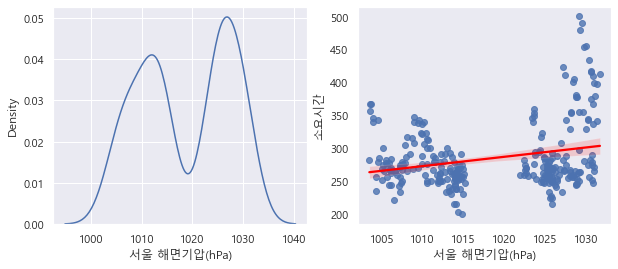

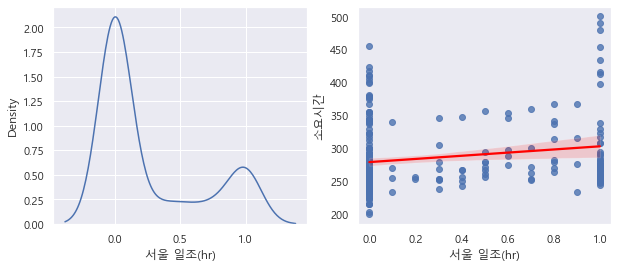

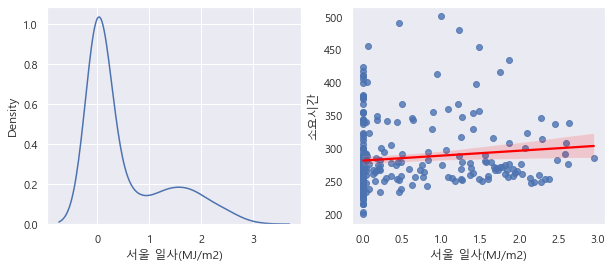

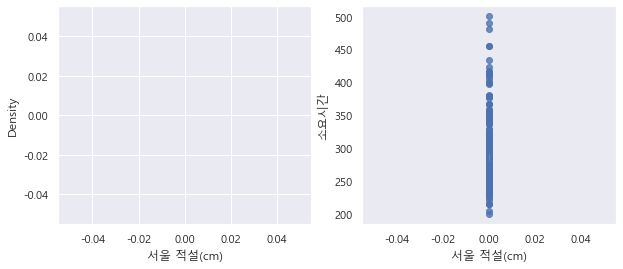

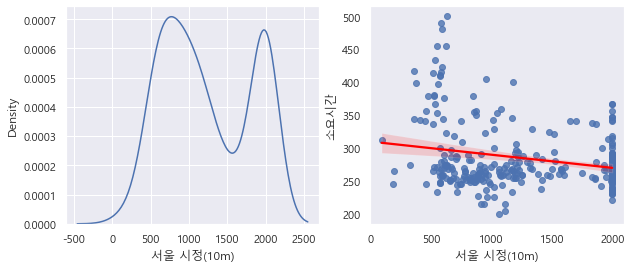

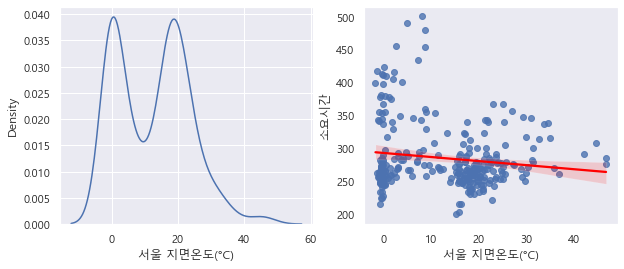

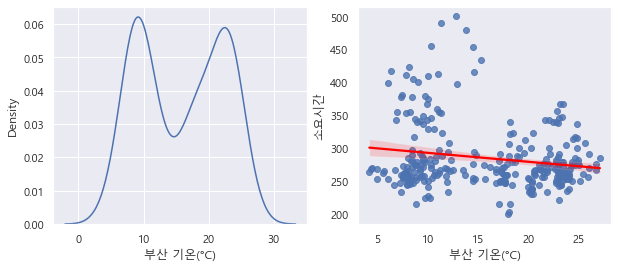

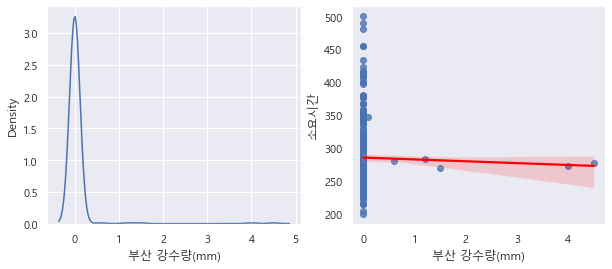

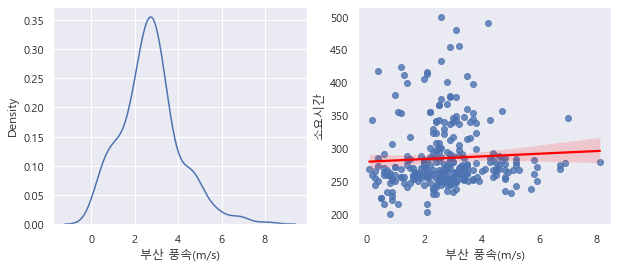

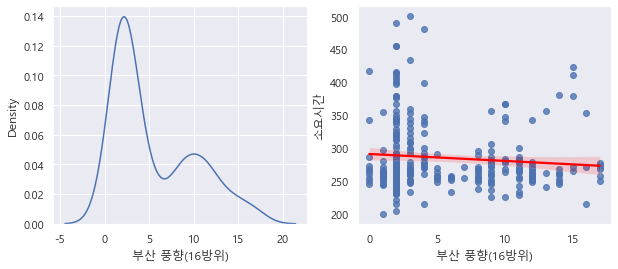

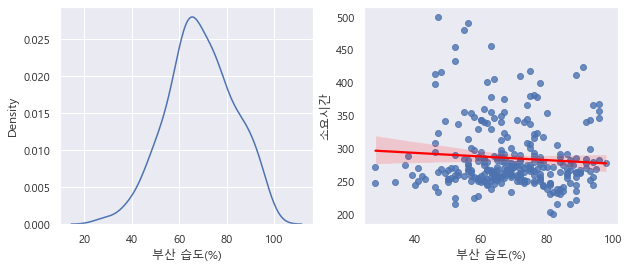

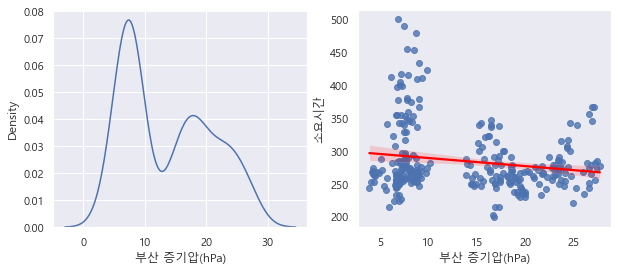

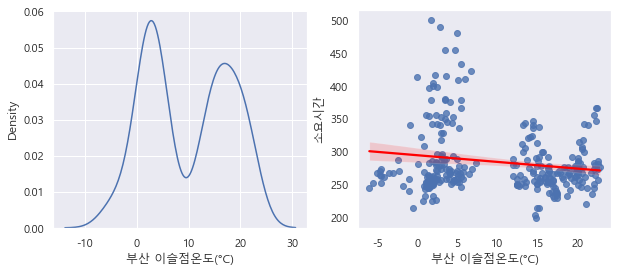

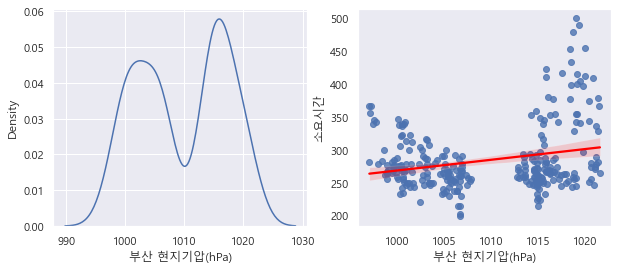

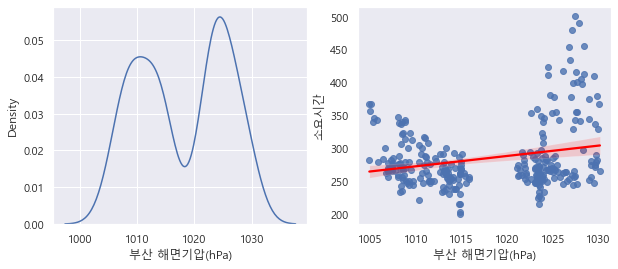

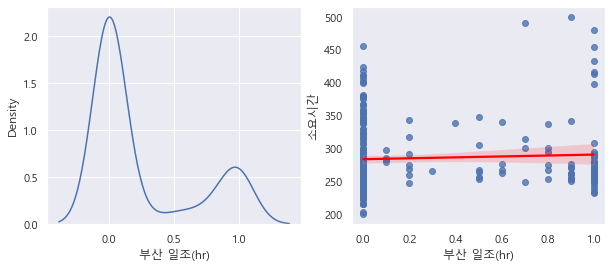

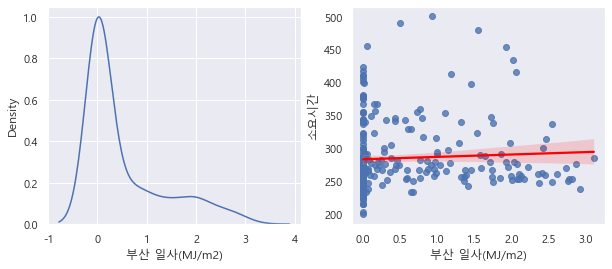

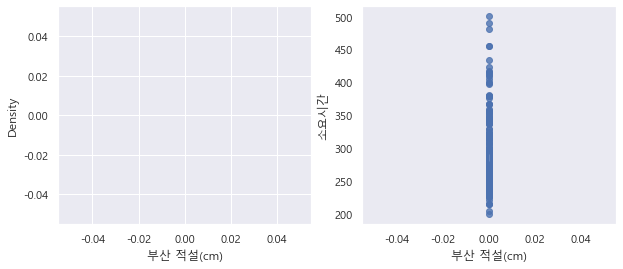

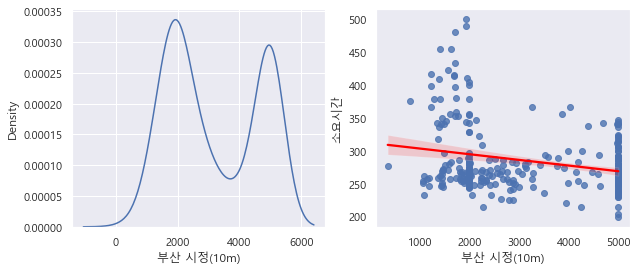

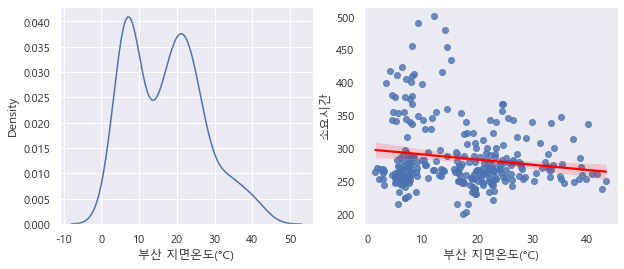

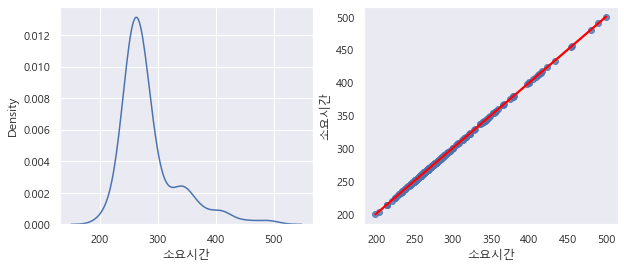

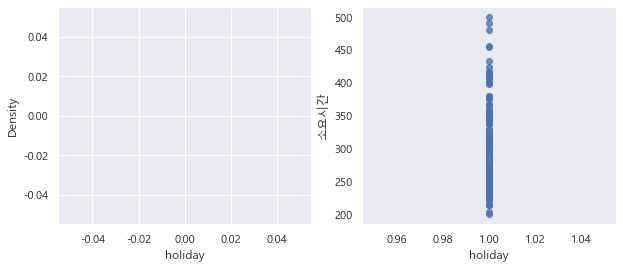

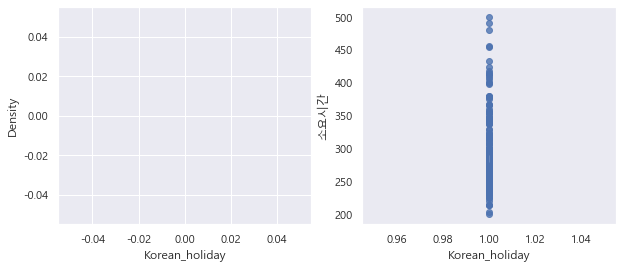

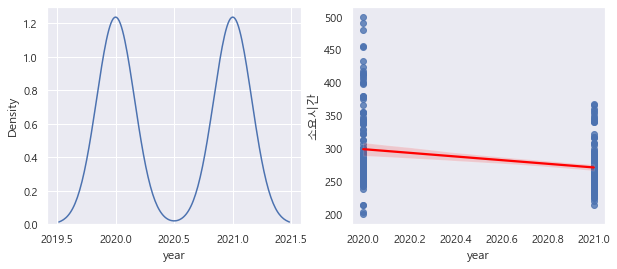

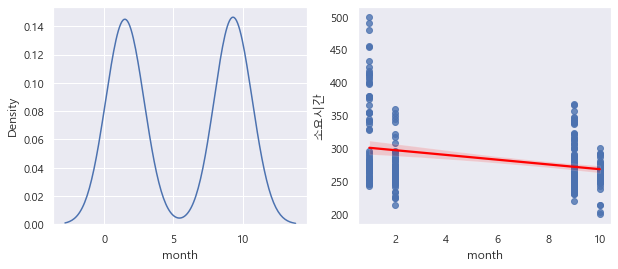

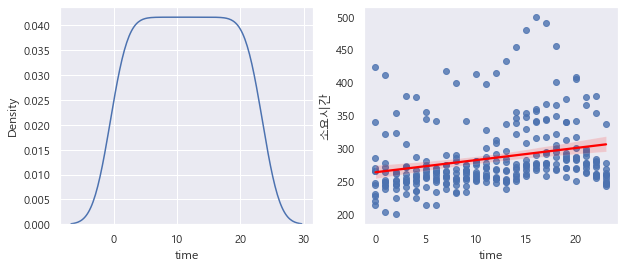

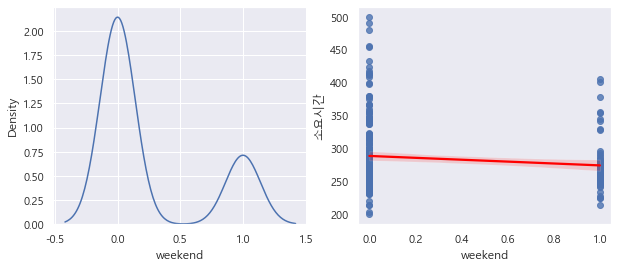

In [32]:
tmp = train_data.loc[train_data['Korean_holiday']==1]
plot_scatterplot(tmp)

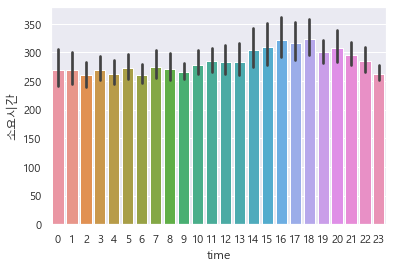

In [33]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="time", y="소요시간", data=tmp)
plt.show()

#### heatmap & 상관분석

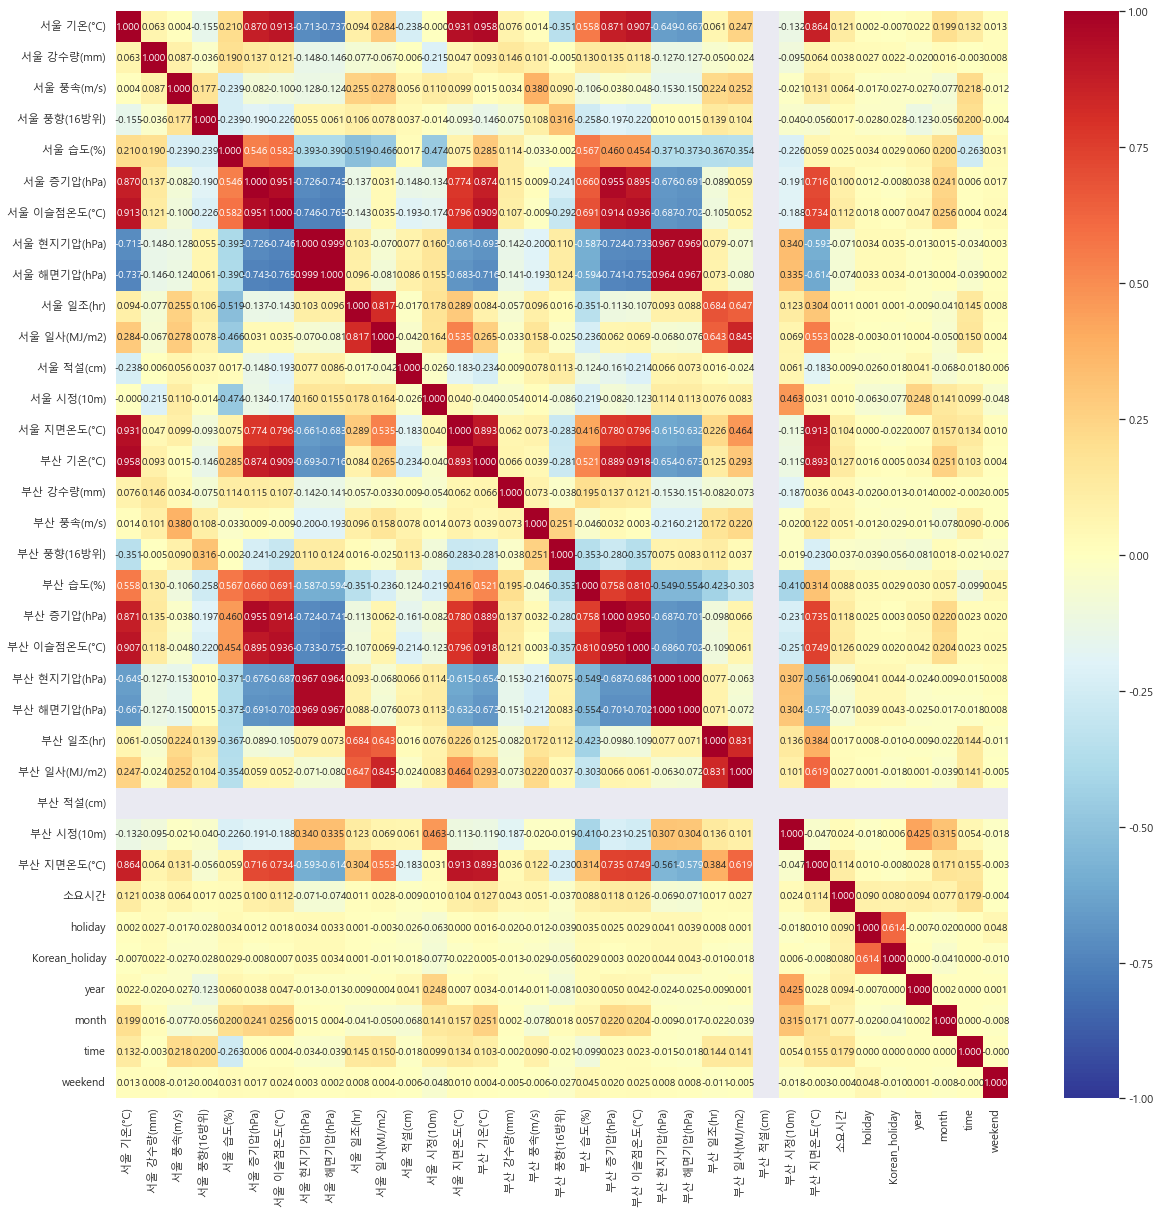

In [8]:
plt.figure(figsize = (20, 20))
sns.heatmap(train_data.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

In [9]:
import scipy.stats as spst

pearsonr_df = pd.DataFrame(columns=['feature', '상관계수', 'pvalue'])
for columns in train_data.columns:
    # 상관계수와 p-value 
    if columns=='소요시간':
        continue
    if train_data[columns].dtype=='object':
        continue
    result = spst.pearsonr(train_data[columns], train_data['소요시간'])
    pearsonr_df = pearsonr_df.append({'feature':columns, '상관계수':result[0], 'pvalue':result[1]},ignore_index=True)

pearsonr_df.sort_values(by='pvalue')
pearsonr_df

,feature,상관계수,pvalue
0,서울 기온(°C),0.121339,1.562453e-58
1,서울 강수량(mm),0.037908,5.100462e-07
2,서울 풍속(m/s),0.063663,3.162930e-17
3,서울 풍향(16방위),0.016949,2.477278e-02
4,서울 습도(%),0.025307,8.014862e-04
5,서울 증기압(hPa),0.099725,5.087507e-40
6,서울 이슬점온도(°C),0.111604,9.712462e-50
7,서울 현지기압(hPa),-0.070778,6.235574e-21
8,서울 해면기압(hPa),-0.074131,8.220672e-23
9,서울 일조(hr),0.010599,1.603553e-01


#### 필요없는 column 삭제

In [3]:
train_data['부산 적설(cm)'].unique()

array([0.])

In [10]:
train_data.drop(columns=['일시', '부산 적설(cm)'], axis=1, inplace=True)
test_data.drop(columns=['일시', '부산 적설(cm)'], axis=1, inplace=True)

### 가변수화

In [5]:
test_data.columns

Index(['서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 풍향(16방위)', '서울 습도(%)',
       '서울 증기압(hPa)', '서울 이슬점온도(°C)', '서울 현지기압(hPa)', '서울 해면기압(hPa)',
       '서울 일조(hr)', '서울 일사(MJ/m2)', '서울 적설(cm)', '서울 시정(10m)', '서울 지면온도(°C)',
       '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 풍향(16방위)', '부산 습도(%)',
       '부산 증기압(hPa)', '부산 이슬점온도(°C)', '부산 현지기압(hPa)', '부산 해면기압(hPa)',
       '부산 일조(hr)', '부산 일사(MJ/m2)', '부산 시정(10m)', '부산 지면온도(°C)', '소요시간',
       'weekday', 'holiday', 'Korean_holiday', 'year', 'month', 'time'],
      dtype='object')

In [11]:
cols = ['weekend', 'holiday', 'Korean_holiday']
train_data = pd.get_dummies(train_data, columns=cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=cols, drop_first=True)

In [12]:
train_data

,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),서울 일사(MJ/m2),서울 적설(cm),서울 시정(10m),서울 지면온도(°C),부산 기온(°C),부산 강수량(mm),부산 풍속(m/s),부산 풍향(16방위),부산 습도(%),부산 증기압(hPa),부산 이슬점온도(°C),부산 현지기압(hPa),부산 해면기압(hPa),부산 일조(hr),부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,year,month,time,weekend_1,holiday_1,Korean_holiday_1
0,-6.5,0.0,0.0,0.0,38.0,1.4,-18.5,1022.6,1033.8,0.0,0.0,0.0,2000.0,-2.8,-2.5,0.0,1.7,16.0,23.0,1.2,-20.8,1021.7,1030.7,0.0,0.0,2000.0,-1.4,265,2020,1,0,0,1,0
1,-5.9,0.0,1.7,2.0,40.0,1.6,-17.3,1021.8,1033.0,0.0,0.0,0.0,2000.0,-2.4,-2.9,0.0,2.0,15.0,22.0,1.1,-21.7,1021.6,1030.6,0.0,0.0,2000.0,-1.6,265,2020,1,1,0,1,0
2,-5.7,0.0,0.1,0.0,42.0,1.7,-16.5,1021.6,1032.8,0.0,0.0,0.0,1988.0,-2.4,-3.1,0.0,1.9,6.0,23.0,1.1,-21.3,1021.6,1030.6,0.0,0.0,2000.0,-1.9,291,2020,1,2,0,1,0
3,-5.6,0.0,0.0,0.0,46.0,1.8,-15.4,1021.5,1032.7,0.0,0.0,0.0,2000.0,-2.7,-2.8,0.0,4.5,1.0,24.0,1.2,-20.6,1021.1,1030.1,0.0,0.0,2000.0,-2.0,284,2020,1,3,0,1,0
4,-5.4,0.0,0.0,0.0,50.0,2.0,-14.2,1021.6,1032.8,0.0,0.0,0.0,1908.0,-2.5,-3.1,0.0,1.9,5.0,35.0,1.7,-16.4,1021.0,1030.0,0.0,0.0,2000.0,-2.1,363,2020,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,-6.4,0.0,2.2,11.0,34.0,1.3,-19.7,1021.1,1032.3,0.0,0.0,0.0,2000.0,-4.5,0.5,0.0,2.0,14.0,22.0,1.4,-18.8,1019.1,1028.0,0.0,0.0,5000.0,-1.6,309,2021,12,19,0,0,0
17540,-6.3,0.0,4.1,14.0,35.0,1.3,-19.2,1021.2,1032.4,0.0,0.0,0.0,2000.0,-5.3,0.0,0.0,2.2,14.0,22.0,1.3,-19.2,1019.1,1028.0,0.0,0.0,5000.0,-2.1,320,2021,12,20,0,0,0
17541,-6.7,0.0,4.8,14.0,36.0,1.3,-19.3,1021.2,1032.4,0.0,0.0,0.0,2000.0,-5.7,-0.4,0.0,4.1,13.0,23.0,1.4,-19.0,1018.7,1027.6,0.0,0.0,5000.0,-2.5,323,2021,12,21,0,0,0
17542,-7.5,0.0,3.0,14.0,37.0,1.3,-19.7,1021.8,1033.1,0.0,0.0,0.0,2000.0,-6.2,-0.8,0.0,3.2,11.0,23.0,1.3,-19.4,1019.5,1028.4,0.0,0.0,5000.0,-2.2,355,2021,12,22,0,0,0


In [15]:
test_data

,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),서울 일사(MJ/m2),서울 적설(cm),서울 시정(10m),서울 지면온도(°C),부산 기온(°C),부산 강수량(mm),부산 풍속(m/s),부산 풍향(16방위),부산 습도(%),부산 증기압(hPa),부산 이슬점온도(°C),부산 현지기압(hPa),부산 해면기압(hPa),부산 일조(hr),부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,year,month,time,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,holiday_1,Korean_holiday_1
0,-8.5,0.0,1.9,14.0,41.0,1.3,-19.4,1021.9,1033.2,0.0,0.00,0.0,2000.0,-7.0,-1.6,0.0,7.2,13.0,25.0,1.4,-19.1,1019.7,1028.6,0.0,0.00,5000.0,-4.4,227,2022,1,0,0,1,0,0,0,0,1,0
1,-9.2,0.0,1.8,12.0,42.0,1.3,-19.7,1022.2,1033.6,0.0,0.00,0.0,2000.0,-7.2,-2.0,0.0,3.6,9.0,24.0,1.3,-19.9,1019.9,1028.8,0.0,0.00,5000.0,-4.7,236,2022,1,1,0,1,0,0,0,0,1,0
2,-9.5,0.0,1.2,12.0,43.0,1.3,-19.7,1022.3,1033.7,0.0,0.00,0.0,2000.0,-7.5,-2.3,0.0,2.4,10.0,24.0,1.2,-20.1,1020.3,1029.3,0.0,0.00,5000.0,-4.7,230,2022,1,2,0,1,0,0,0,0,1,0
3,-9.3,0.0,1.4,13.0,46.0,1.4,-18.8,1022.6,1034.0,0.0,0.00,0.0,2000.0,-7.6,-2.8,0.0,3.5,12.0,27.0,1.3,-19.2,1020.6,1029.6,0.0,0.00,5000.0,-5.3,233,2022,1,3,0,1,0,0,0,0,1,0
4,-9.6,0.0,1.7,15.0,48.0,1.4,-18.5,1021.9,1033.3,0.0,0.00,0.0,2000.0,-7.6,-2.3,0.0,2.4,10.0,20.0,1.0,-22.2,1020.0,1029.0,0.0,0.00,5000.0,-5.5,229,2022,1,4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,23.2,0.0,3.2,11.0,66.0,18.6,16.4,999.6,1009.4,5.0,0.17,0.0,2000.0,20.1,24.5,0.0,1.8,14.0,64.0,19.6,17.2,1000.8,1008.7,4.0,0.11,5000.0,25.1,289,2022,9,19,0,0,0,0,1,0,0,0
5972,22.1,0.0,1.8,11.0,68.0,18.1,15.9,1000.6,1010.4,0.0,0.00,0.0,2000.0,18.7,23.5,0.0,1.3,14.0,67.0,19.4,17.0,1001.7,1009.6,0.0,0.00,5000.0,24.2,290,2022,9,20,0,0,0,0,1,0,0,0
5973,21.2,0.0,1.8,11.0,71.0,17.8,15.7,1001.8,1011.7,0.0,0.00,0.0,2000.0,17.8,23.0,0.0,1.0,13.0,69.0,19.2,16.9,1002.5,1010.4,0.0,0.00,5000.0,23.5,291,2022,9,21,0,0,0,0,1,0,0,0
5974,20.6,0.0,1.4,12.0,74.0,17.8,15.7,1002.7,1012.6,0.0,0.00,0.0,2000.0,17.5,22.1,0.0,1.2,14.0,72.0,19.1,16.8,1003.3,1011.3,0.0,0.00,5000.0,22.8,278,2022,9,22,0,0,0,0,1,0,0,0


### target 변수 생성

In [13]:
train_data['y'] = train_data['소요시간'].shift(-1)
train_data['y'].fillna(test_data.iloc[0]['소요시간'], inplace=True)
train_data['y'] = train_data['y'].astype(int)

test_data['y'] = test_data['소요시간'].shift(-1)
test_data = test_data.iloc[:-1, :]
test_data['y'] = test_data['y'].astype(int)

### 데이터 나누기

In [14]:
target = 'y'

x_train = train_data.drop(target, axis=1)
y_train = train_data.loc[:, target]

x_test = test_data.drop(target, axis=1)
y_test = test_data.loc[:, target]

In [15]:
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)